In [ ]:
import tensorflow.keras.layers
import tensorflow.keras.models
import tensorflow.keras.optimizers
import tensorflow.keras.datasets
import numpy
import matplotlib.pyplot as plt


# Dense Autoencoder


In [ ]:

# Encoder
x = tensorflow.keras.layers.Input(shape=(784), name="encoder_input")

encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="encoder_dense_1")(x)
encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=2, name="encoder_dense_2")(encoder_activ_layer1)
encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_output")(encoder_dense_layer2)

encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")
encoder.summary()

# Decoder
decoder_input = tensorflow.keras.layers.Input(shape=(2), name="decoder_input")

decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="decoder_dense_1")(decoder_input)
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=784, name="decoder_dense_2")(decoder_activ_layer1)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer2)

decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")
decoder.summary()

# Autoencoder
ae_input = tensorflow.keras.layers.Input(shape=(784), name="AE_input")
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)

ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")
ae.summary()


Model: "encoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
encoder_dense_1 (Dense)      (None, 300)               235500    
_________________________________________________________________
encoder_leakyrelu_1 (LeakyRe (None, 300)               0         
_________________________________________________________________
encoder_dense_2 (Dense)      (None, 2)                 602       
_________________________________________________________________
encoder_output (LeakyReLU)   (None, 2)                 0         
Total params: 236,102
Trainable params: 236,102
Non-trainable params: 0
_________________________________________________________________
Model: "decoder_model"
_________________________________________________________________
Layer (type)            

In [ ]:

# RMSE
def rmse(y_true, y_predict):
    return tensorflow.keras.backend.mean(tensorflow.keras.backend.square(y_true-y_predict))

# AE Compilation
ae.compile(loss="mse", optimizer=tensorflow.keras.optimizers.Adam(lr=0.0005))


In [ ]:
# Preparing MNIST Dataset
(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train = np.reshape(x_train_orig, newshape=(x_train_orig.shape[0], np.prod(x_train_orig.shape[1:])))
x_test = np.reshape(x_test_orig, newshape=(x_test_orig.shape[0], np.prod(x_test_orig.shape[1:])))

In [ ]:
# Training AE
ae.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

encoded_images = encoder.predict(x_train)
decoded_images = decoder.predict(encoded_images)
decoded_images_orig = np.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))


Epoch 1/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0683 - val_loss: 0.0547
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0544 - val_loss: 0.0530
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0529 - val_loss: 0.0520
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0519 - val_loss: 0.0512
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0511 - val_loss: 0.0504
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0505 - val_loss: 0.0499
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0499 - val_loss: 0.0496
Epoch 8/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0496 - val_loss: 0.0490
Epoch 9/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0488 - val_loss: 0.0485
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0485 - val_loss: 0.0481

In [ ]:
np.shape(x_train)

(60000, 784)

In [ ]:
encoded_images_test = encoder.predict(x_test)
decoded_images_test = decoder.predict(encoded_images_test)
decoded_images_orig_test = np.reshape(decoded_images_test, newshape=(decoded_images_test.shape[0], 28, 28))

### Original vs recovered images

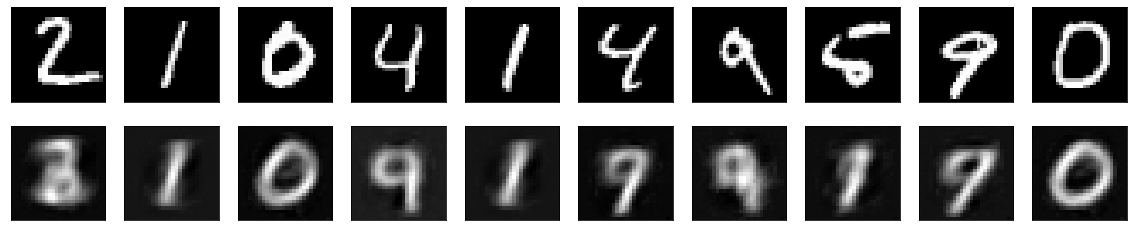

In [ ]:
num_images_to_show = 10
plt.figure(figsize=(20,4))

for i in range(1,num_images_to_show+1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_orig[i, :, :])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_images_orig_test[i, :, :])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()




### Distribution of clusters of encoded digits

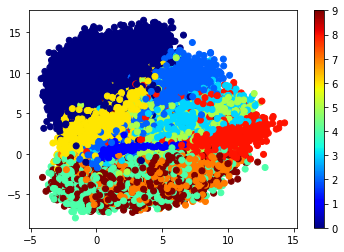

In [ ]:
plt.figure()
plt.scatter(encoded_images[:, 0], encoded_images[:, 1], c=y_train,cmap=plt.cm.jet)
plt.colorbar()

# Convolutional Autoencoder

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 8)           0   

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 6s 11ms/step - loss: 0.3099 - val_loss: 0.1502
Epoch 2/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1436 - val_loss: 0.1291
Epoch 3/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1272 - val_loss: 0.1208
Epoch 4/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1196 - val_loss: 0.1147
Epoch 5/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1151 - val_loss: 0.1114
Epoch 6/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1121 - val_loss: 0.1089
Epoch 7/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1097 - val_loss: 0.1067
Epoch 8/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1076 - val_loss: 0.1050
Epoch 9/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1062 - val_loss: 0.1037
Epoch 10/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1048 - val_lo

### Original vs  Recovered images

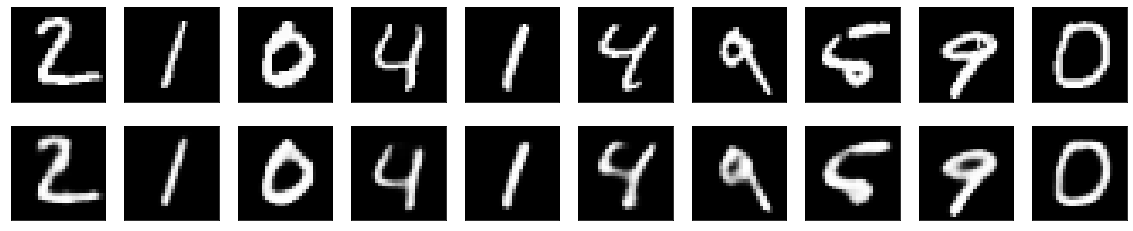

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

###  Examples of encodings of a few images

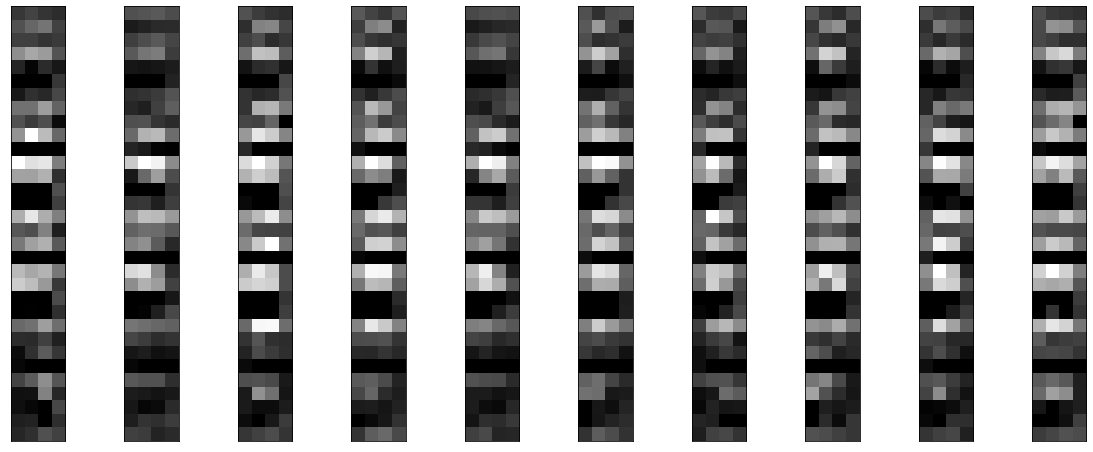

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoded_imgs.shape

(10000, 4, 4, 8)